In [1]:
import sys
import tensorflow as tf
import numpy as np

sys.path.append('../usr/lib/eval-utils-nih')

import eval_utils_nih as eu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2156)              54091884  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2156)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1280)              2760960   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0

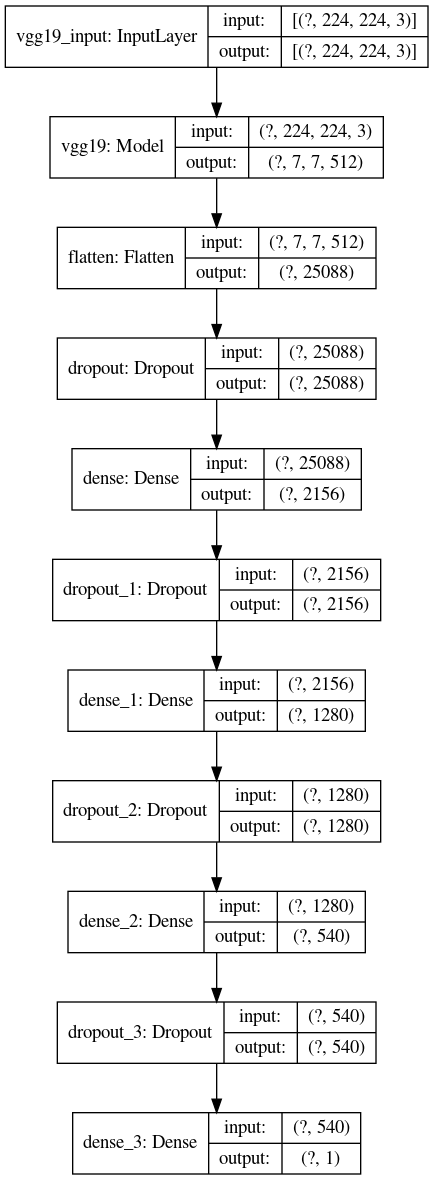

In [2]:
model = eu.load_model('../input/model-2', 'model.h5')

model.summary()

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [3]:
data_dir = '../input/chest-xray-pneumonia/chest_xray'
train_dir_name = 'train'
test_dir_name = 'test'
valid_dir_name = 'val'
classes = ['NORMAL', 'PNEUMONIA']

In [4]:
train_generator, valid_generator, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        None,
        valid_dir_name
    )

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

163/163 [==============================] - 73s 447ms/step - loss: 0.6051 - accuracy: 0.7788

Loss: 0.605
Accuracy: 77.876%


In [6]:
eu.evaludate_model_n_print_loss_n_acc(model, valid_generator)

1/1 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7500

Loss: 0.628
Accuracy: 75.000%


In [7]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

20/20 [==============================] - 7s 340ms/step - loss: 0.5965 - accuracy: 0.7965

Loss: 0.597
Accuracy: 79.647%


In [8]:
train_preds = model.predict(train_generator, verbose=1)

163/163 [==============================] - 60s 369ms/step


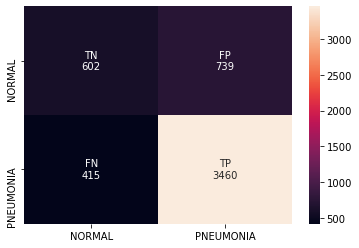

In [9]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    np.rint(train_preds),
    classes,
    cmap=None
)

In [10]:
eu.generate_classification_report(
    train_generator,
    np.rint(train_preds),
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.59      0.45      0.51      1341
   PNEUMONIA       0.82      0.89      0.86      3875

    accuracy                           0.78      5216
   macro avg       0.71      0.67      0.68      5216
weighted avg       0.76      0.78      0.77      5216



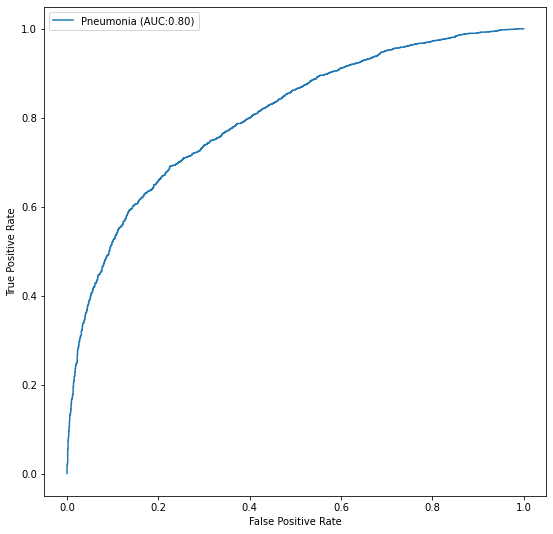

In [11]:
eu.plot_roc_curve(train_generator.classes, train_preds)

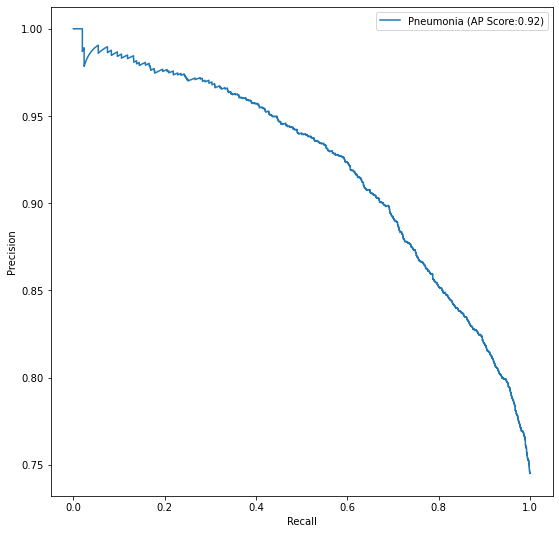

In [12]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

In [13]:
data_dir = '../input/chest-xray-covid19-pneumonia/Data'

train_generator, _, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 1172 images belonging to 2 classes.
Found 4684 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [14]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

147/147 [==============================] - 63s 426ms/step - loss: 0.6042 - accuracy: 0.7786

Loss: 0.604
Accuracy: 77.861%


In [15]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

37/37 [==============================] - 16s 424ms/step - loss: 0.6043 - accuracy: 0.7884

Loss: 0.604
Accuracy: 78.840%


In [16]:
train_preds = model.predict(train_generator, verbose=1)

147/147 [==============================] - 55s 372ms/step


In [17]:
test_preds = model.predict(test_generator, verbose=1)

37/37 [==============================] - 13s 345ms/step


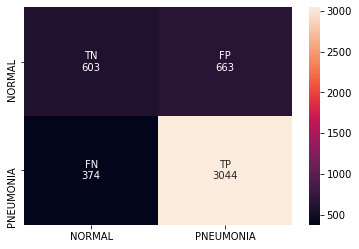

In [18]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    np.rint(train_preds),
    classes,
    cmap=None
)

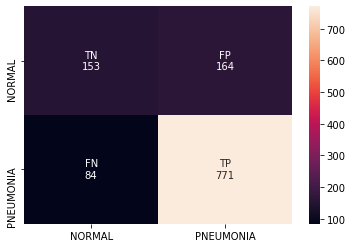

In [19]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    test_generator,
    np.rint(test_preds),
    classes,
    cmap=None
)

In [20]:
eu.generate_classification_report(
    train_generator,
    np.rint(train_preds),
    classes
)

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.62      0.48      0.54      1266
   PNEUMONIA       0.82      0.89      0.85      3418

    accuracy                           0.78      4684
   macro avg       0.72      0.68      0.70      4684
weighted avg       0.77      0.78      0.77      4684



In [21]:
eu.generate_classification_report(
    test_generator,
    np.rint(test_preds),
    classes
)


Classification Report
              precision    recall  f1-score   support

      NORMAL       0.65      0.48      0.55       317
   PNEUMONIA       0.82      0.90      0.86       855

    accuracy                           0.79      1172
   macro avg       0.74      0.69      0.71      1172
weighted avg       0.78      0.79      0.78      1172



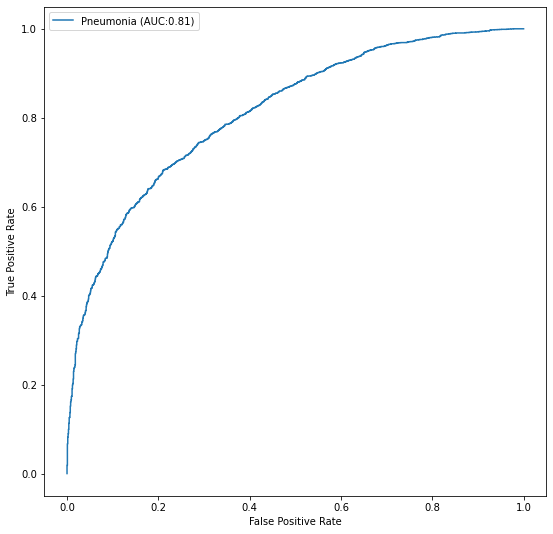

In [22]:
eu.plot_roc_curve(train_generator.classes, train_preds)

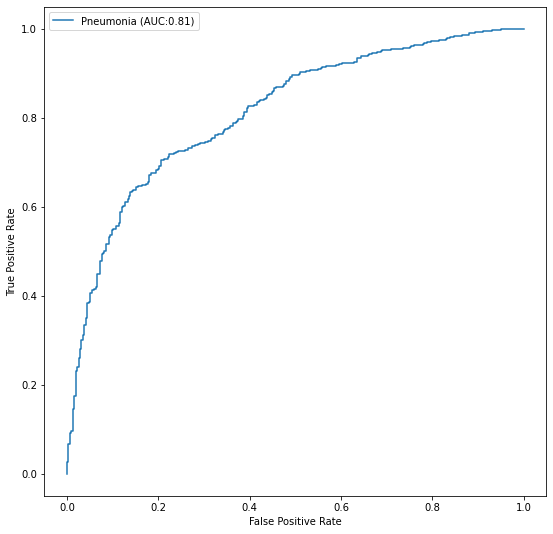

In [23]:
eu.plot_roc_curve(test_generator.classes, test_preds)

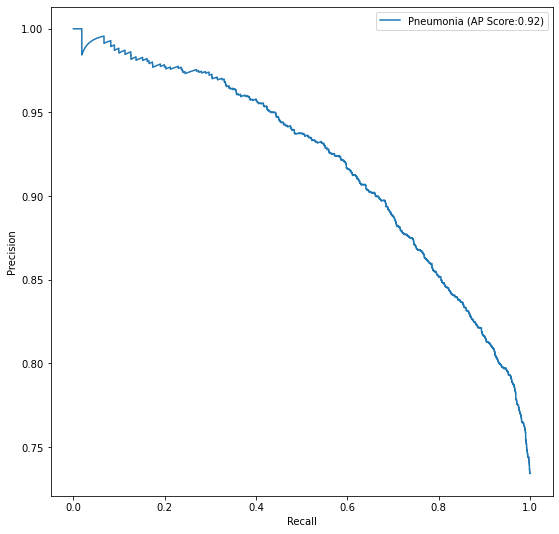

In [24]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

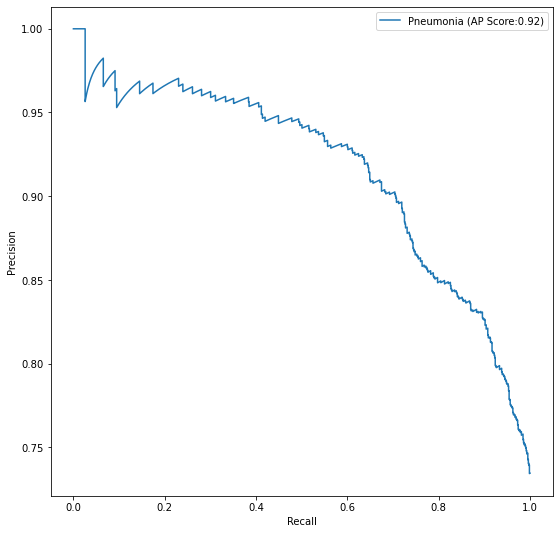

In [25]:
eu.plot_precision_recall_curve(test_generator.classes, test_preds)

In [26]:
data_dir = '../input/chest-xray-covid19-pneumonia/Data'
classes = ['COVID19', 'PNEUMONIA']

train_generator, _, test_generator = \
    eu.generate_datasets(
        data_dir, 
        train_dir_name, 
        test_dir_name, 
        classes,
        valid_dir_name
    )

Found 971 images belonging to 2 classes.
Found 3878 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [27]:
eu.evaludate_model_n_print_loss_n_acc(model, train_generator)

122/122 [==============================] - 46s 373ms/step - loss: 0.5891 - accuracy: 0.8365

Loss: 0.589
Accuracy: 83.651%


In [28]:
eu.evaludate_model_n_print_loss_n_acc(model, test_generator)

31/31 [==============================] - 11s 342ms/step - loss: 0.5840 - accuracy: 0.8496

Loss: 0.584
Accuracy: 84.964%


In [29]:
train_preds = model.predict(train_generator, verbose=1)

122/122 [==============================] - 43s 348ms/step


In [30]:
test_preds = model.predict(test_generator, verbose=1)

31/31 [==============================] - 10s 330ms/step


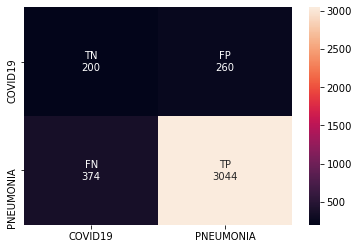

In [31]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    train_generator,
    np.rint(train_preds),
    classes,
    cmap=None
)

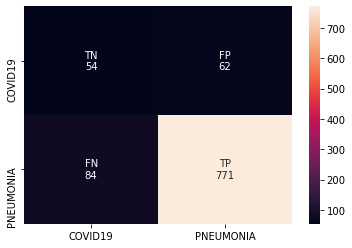

In [32]:
eu.draw_confusion_matrix_by_data_generator_n_predictions(
    test_generator,
    np.rint(test_preds),
    classes,
    cmap=None
)

In [33]:
eu.generate_classification_report(
    train_generator,
    np.rint(train_preds),
    classes
)

Classification Report
              precision    recall  f1-score   support

     COVID19       0.35      0.43      0.39       460
   PNEUMONIA       0.92      0.89      0.91      3418

    accuracy                           0.84      3878
   macro avg       0.63      0.66      0.65      3878
weighted avg       0.85      0.84      0.84      3878



In [34]:
eu.generate_classification_report(
    test_generator,
    np.rint(test_preds),
    classes
)


Classification Report
              precision    recall  f1-score   support

     COVID19       0.39      0.47      0.43       116
   PNEUMONIA       0.93      0.90      0.91       855

    accuracy                           0.85       971
   macro avg       0.66      0.68      0.67       971
weighted avg       0.86      0.85      0.86       971



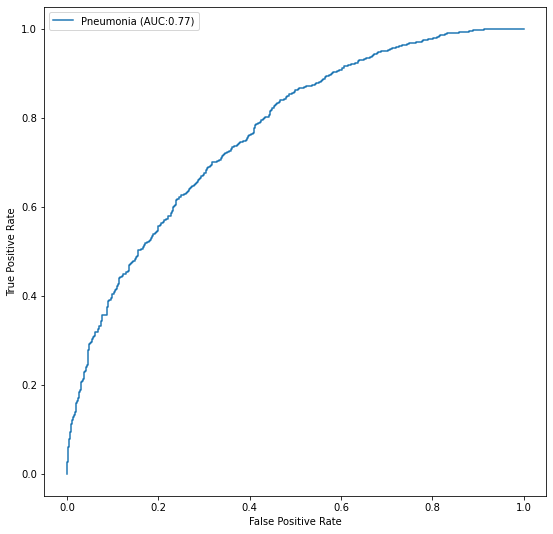

In [35]:
eu.plot_roc_curve(train_generator.classes, train_preds)

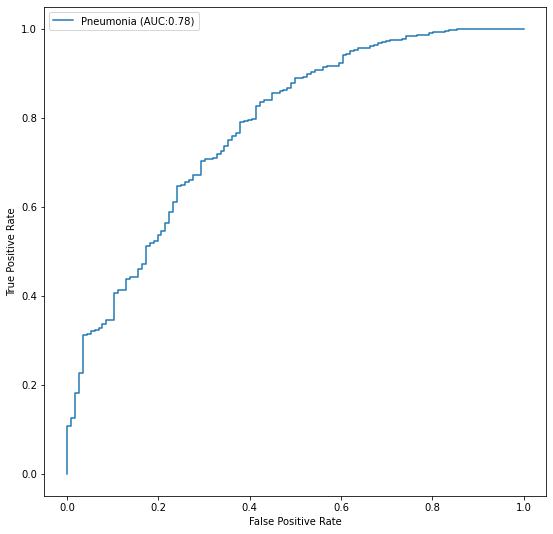

In [36]:
eu.plot_roc_curve(test_generator.classes, test_preds)

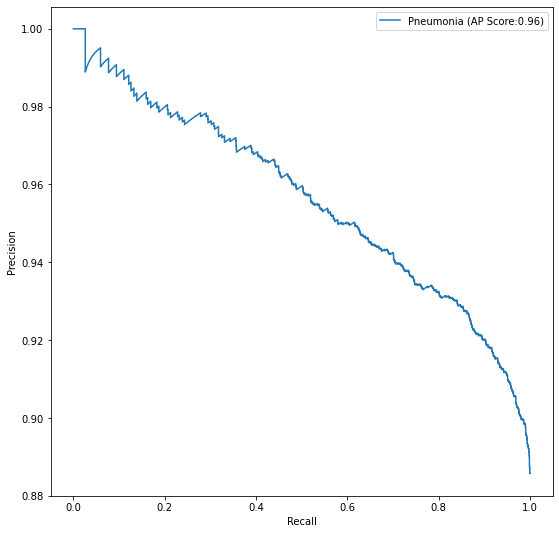

In [37]:
eu.plot_precision_recall_curve(train_generator.classes, train_preds)

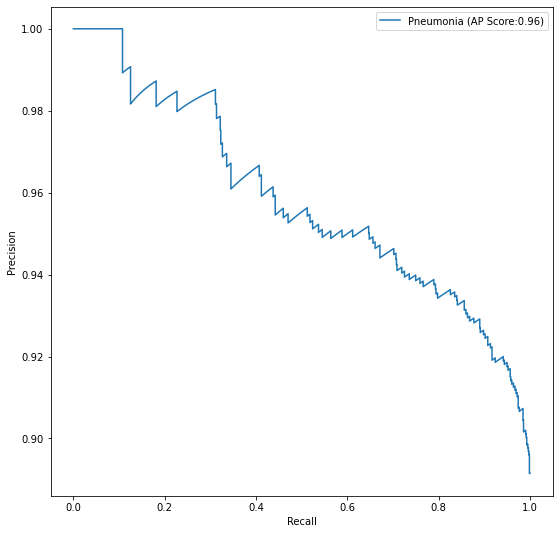

In [38]:
eu.plot_precision_recall_curve(test_generator.classes, test_preds)